In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sc
%matplotlib inline

from importlib import reload
from matplotlib import cm

from sklearn.decomposition import PCA

import ps.feature_analysis as fa
import ps.joint_probability as psjp

import warnings
warnings.simplefilter("ignore", category=PendingDeprecationWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

/home/ryohayama/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv('train.csv', header=0)

all_fs = train.columns[2:]
binary_fs = sorted([f for f in all_fs if '_bin' in f])
categorical_fs = sorted([f for f in all_fs if '_cat' in f])
other_fs = sorted([f for f in all_fs
                if f not in binary_fs
                if f not in categorical_fs])

target = train.target

In [3]:
num_samples = len(target)
num_target = np.sum(target)
freq_target = num_target/num_samples
freq_target

0.036447517859182946

# Binaries

### ind_bin
nb42 result suggest that using all but ind_08 and ind_09 yields the best expected value

In [4]:
ind_bins_fs = [f for f in all_fs 
               if '_bin' in f
               if '_ind' in f]
ind_bins_fs = ind_bins_fs.copy()
ind_bins_fs.remove('ps_ind_08_bin')
ind_bins_fs.remove('ps_ind_09_bin')

ind_bins = train[ind_bins_fs]

ind_bins.columns

Index(['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin'],
      dtype='object')

In [5]:
combo1 = tuple(f for f in ind_bins_fs)
opt1 = psjp.JointProbabilityOptimizer(ind_bins, verbose=True)
res1 = opt1.getExp(combo1, target)

In [6]:
res1

860.1393829057389

### calc

In [7]:
calc_bins_fs = [f for f in binary_fs 
               if '_bin' in f
               if '_calc' in f]
calc_bins = train[calc_bins_fs]
calc_bins_fs

['ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

calc_bin features appear to be useless in bringing the probability higher. So not conducted

# Categoricals

### car

In [8]:
reload(psjp)

<module 'ps.joint_probability' from '/home/ryohayama/python_current/porto_seguro/ps/joint_probability.py'>

In [9]:
car_cats_fs = [f for f in categorical_fs if 'car' in f]
car_cats = train[car_cats_fs] + 1

car_cat_small_fs = ['ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat',
                     'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat']
car_cat_big_fs = [f for f in car_cats if f not in car_cat_small_fs]

car_cat_small = car_cats[car_cat_small_fs]
car_cat_big = car_cats[car_cat_big_fs]

print(car_cat_small_fs)
print(car_cat_big_fs)

['ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat']
['ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_11_cat']


In [10]:
opt21 = psjp.JointProbabilityOptimizer(car_cat_big, verbose=True)
res21 = opt21.selectByAddition(car_cat_small, target)

 0/ 7: Processing Original
 1/ 7: Processing with ps_car_02_cat
 2/ 7: Processing with ps_car_03_cat
 3/ 7: Processing with ps_car_05_cat
 4/ 7: Processing with ps_car_07_cat
 5/ 7: Processing with ps_car_08_cat
 6/ 7: Processing with ps_car_09_cat
 7/ 7: Processing with ps_car_10_cat


In [11]:
pd.DataFrame({'exp_val': res21[0], 'importance_': res21[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_car_09_cat,1212.594591,0.232506
ps_car_07_cat,1148.121908,0.166974
ps_car_03_cat,1137.214309,0.155888
ps_car_05_cat,1129.849146,0.148401
ps_car_08_cat,1061.217347,0.078643
ps_car_02_cat,1041.559716,0.058662
ps_car_10_cat,1013.745295,0.030391
initial,983.845102,0.000000


In [12]:
add1_fs = car_cat_big_fs + ['ps_car_09_cat']
add1 = car_cats[add1_fs]
removed_fs = car_cat_small_fs.copy()
removed_fs.remove('ps_car_09_cat')
removed = car_cat_small[removed_fs]

In [13]:
opt22 = psjp.JointProbabilityOptimizer(add1, verbose=True)
res22 = opt22.selectByAddition(removed, target)

 0/ 6: Processing Original
 1/ 6: Processing with ps_car_02_cat
 2/ 6: Processing with ps_car_03_cat
 3/ 6: Processing with ps_car_05_cat
 4/ 6: Processing with ps_car_07_cat
 5/ 6: Processing with ps_car_08_cat
 6/ 6: Processing with ps_car_10_cat


In [14]:
pd.DataFrame({'exp_val': res22[0], 'importance_': res22[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_car_05_cat,1534.227483,0.265244
ps_car_03_cat,1512.779695,0.247556
ps_car_07_cat,1497.985542,0.235356
ps_car_08_cat,1374.392476,0.133431
ps_car_02_cat,1324.654774,0.092414
ps_car_10_cat,1259.060487,0.038319
initial,1212.594591,0.000000


In [15]:
add2_fs = add1_fs + ['ps_car_05_cat']
add2 = car_cats[add2_fs]
removed_fs2 = removed_fs.copy()
removed_fs2.remove('ps_car_05_cat')
removed2 = car_cat_small[removed_fs2]

In [16]:
opt23 = psjp.JointProbabilityOptimizer(add2, verbose=True)
res23 = opt23.selectByAddition(removed2, target)

 0/ 5: Processing Original
 1/ 5: Processing with ps_car_02_cat
 2/ 5: Processing with ps_car_03_cat
 3/ 5: Processing with ps_car_07_cat
 4/ 5: Processing with ps_car_08_cat
 5/ 5: Processing with ps_car_10_cat


In [17]:
pd.DataFrame({'exp_val': res23[0], 'importance_': res23[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_car_07_cat,1933.084336,0.259972
ps_car_08_cat,1827.990112,0.191473
ps_car_03_cat,1790.664354,0.167144
ps_car_02_cat,1730.765627,0.128102
ps_car_10_cat,1596.203468,0.040396
initial,1534.227483,0.000000


In [18]:
add3_fs = add2_fs + ['ps_car_07_cat']
add3 = car_cats[add3_fs]
removed_fs3 = removed_fs2.copy()
removed_fs3.remove('ps_car_07_cat')
removed3 = car_cat_small[removed_fs3]

In [19]:
opt24 = psjp.JointProbabilityOptimizer(add3, verbose=True)
res24 = opt24.selectByAddition(removed3, target)

 0/ 4: Processing Original
 1/ 4: Processing with ps_car_02_cat
 2/ 4: Processing with ps_car_03_cat
 3/ 4: Processing with ps_car_08_cat
 4/ 4: Processing with ps_car_10_cat


In [20]:
pd.DataFrame({'exp_val': res24[0], 'importance_': res24[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_car_08_cat,2310.974309,0.195486
ps_car_03_cat,2245.324463,0.161524
ps_car_02_cat,2169.755466,0.122432
ps_car_10_cat,2002.624079,0.035973
initial,1933.084336,0.000000


In [21]:
add4_fs = add3_fs + ['ps_car_08_cat']
add4 = car_cats[add4_fs]
removed_fs4 = removed_fs3.copy()
removed_fs4.remove('ps_car_08_cat')
removed4 = car_cat_small[removed_fs4]

In [22]:
opt25 = psjp.JointProbabilityOptimizer(add4, verbose=True)
res25 = opt25.selectByAddition(removed4, target)

 0/ 3: Processing Original
 1/ 3: Processing with ps_car_02_cat
 2/ 3: Processing with ps_car_03_cat
 3/ 3: Processing with ps_car_10_cat


In [23]:
pd.DataFrame({'exp_val': res25[0], 'importance_': res25[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_car_03_cat,2636.811923,0.140996
ps_car_02_cat,2576.368434,0.114841
ps_car_10_cat,2380.605340,0.030131
initial,2310.974309,0.000000


In [24]:
add5_fs = add4_fs + ['ps_car_03_cat']
add5 = car_cats[add5_fs]
removed_fs5 = removed_fs4.copy()
removed_fs5.remove('ps_car_03_cat')
removed5 = car_cat_small[removed_fs5]

In [25]:
opt26 = psjp.JointProbabilityOptimizer(add5, verbose=True)
res26 = opt26.selectByAddition(removed5, target)

 0/ 2: Processing Original
 1/ 2: Processing with ps_car_02_cat
 2/ 2: Processing with ps_car_10_cat


In [26]:
pd.DataFrame({'exp_val': res26[0], 'importance_': res26[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_car_02_cat,2929.151139,0.110868
ps_car_10_cat,2709.888946,0.027714
initial,2636.811923,0.000000


In [27]:
add6_fs = add5_fs + ['ps_car_02_cat']
add6 = car_cats[add6_fs]
removed_fs6 = removed_fs5.copy()
removed_fs6.remove('ps_car_02_cat')
removed6 = car_cat_small[removed_fs6]

In [28]:
opt27 = psjp.JointProbabilityOptimizer(add6, verbose=True)
res27 = opt27.selectByAddition(removed6, target)

 0/ 1: Processing Original
 1/ 1: Processing with ps_car_10_cat


In [29]:
pd.DataFrame({'exp_val': res27[0], 'importance_': res27[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_car_10_cat,3006.865110,0.026531
initial,2929.151139,0.000000


In [30]:
psjp.JointProbabilityOptimizer(car_cats, verbose=True).getExp(car_cats_fs, target)

3006.865109799247

After all, I'll have to combine all the car features...

### ind

In [31]:
ind_cat_fs = [f for f in categorical_fs if 'ind' in f]
ind_cat = train[ind_cat_fs] + 1
ind_cat_fs

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat']

In [32]:
%%time
opt4 = psjp.JointProbabilityOptimizer(ind_cat, verbose=True)
res4 = opt4.exhaustiveCombinatorialSelection(target, parallel=True)

Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-client.json


OSError: Connection file '~/.ipython/profile_default/security/ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

In [33]:
print(opt4.best_expected_value_)
print(opt4.best_combination_)

0
None


## Try combining car with other types

In [34]:
car_opt1 = psjp.JointProbabilityOptimizer(car_cats, verbose=True)
car_res1 = car_opt1.selectByAddition(ind_cat, target)

 0/ 3: Processing Original
 1/ 3: Processing with ps_ind_02_cat
 2/ 3: Processing with ps_ind_04_cat
 3/ 3: Processing with ps_ind_05_cat


In [35]:
pd.DataFrame({'exp_val': car_res1[0], 'importance_': car_res1[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_ind_05_cat,4312.602154,0.434252
ps_ind_02_cat,4121.087436,0.370559
ps_ind_04_cat,3823.766927,0.271679
initial,3006.865110,0.000000


## Try combining ind binaries and categoricals

In [36]:
indAll_opt1 = psjp.JointProbabilityOptimizer(ind_bins, verbose=True)
indAll_res1 = indAll_opt1.selectByAddition(ind_cat, target)

 0/ 3: Processing Original
 1/ 3: Processing with ps_ind_02_cat
 2/ 3: Processing with ps_ind_04_cat
 3/ 3: Processing with ps_ind_05_cat


In [38]:
pd.DataFrame({'exp_val': indAll_res1[0], 'importance_': indAll_res1[1]})\
                .sort_values('importance_', ascending=False)

,exp_val,importance_
ps_ind_05_cat,925.693271,0.076213
ps_ind_02_cat,881.872214,0.025267
ps_ind_04_cat,879.476327,0.022481
initial,860.139383,0.000000


In [39]:
inds = pd.concat([ind_bins, ind_cat], axis=1)
inds.columns

Index(['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat'],
      dtype='object')

In [40]:
opt7 = psjp.JointProbabilityOptimizer(inds, verbose=True)
res7 = opt7.selectByElimination(target)

 0/12: Processing Original
 1/12: Processing without ps_ind_06_bin
 2/12: Processing without ps_ind_07_bin
 3/12: Processing without ps_ind_10_bin
 4/12: Processing without ps_ind_11_bin
 5/12: Processing without ps_ind_12_bin
 6/12: Processing without ps_ind_13_bin
 7/12: Processing without ps_ind_16_bin
 8/12: Processing without ps_ind_17_bin
 9/12: Processing without ps_ind_18_bin
10/12: Processing without ps_ind_02_cat
11/12: Processing without ps_ind_04_cat
12/12: Processing without ps_ind_05_cat


In [41]:
pd.DataFrame({'exp_val': res7[0], 'importance_': res7[1]}).sort_values('importance_', ascending=False)

,exp_val,importance_
ps_ind_05_cat,897.109495,0.096844
ps_ind_02_cat,948.787062,0.044818
ps_ind_07_bin,958.690696,0.034848
ps_ind_04_cat,965.414235,0.028079
ps_ind_06_bin,969.045768,0.024423
ps_ind_17_bin,971.045743,0.022409
ps_ind_12_bin,972.238167,0.021209
ps_ind_18_bin,982.455809,0.010922
ps_ind_11_bin,983.178885,0.010194
ps_ind_16_bin,983.831661,0.009537


In [42]:
jp = psjp.JointProbability()
jp.fit(inds, target, label='ind_proba')
a1 = jp.transform(inds, label='ind_proba')

In [43]:
jp.contingency

target,combined_feature,0,1,ind_proba
0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",2,3,0.600000
1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)",12,1,0.076923
2,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7)",1,0,0.000000
3,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1)",11,0,0.000000
4,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0)",1,0,0.000000
5,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1)",4643,167,0.034719
6,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2)",70,5,0.066667
7,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3)",26,2,0.071429
8,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 4)",61,3,0.046875
9,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 5)",116,9,0.072000


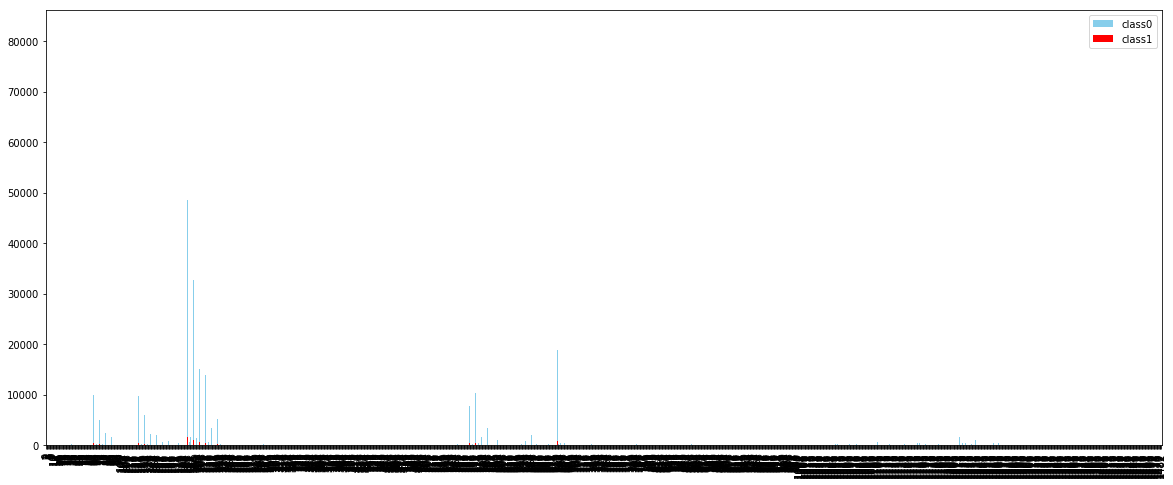

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
jp.contingency[0].plot(kind='bar', ax=ax, color='skyblue', label='class0')
jp.contingency[1].plot(kind='bar', ax=ax, color='red', label='class1')
ax.legend()

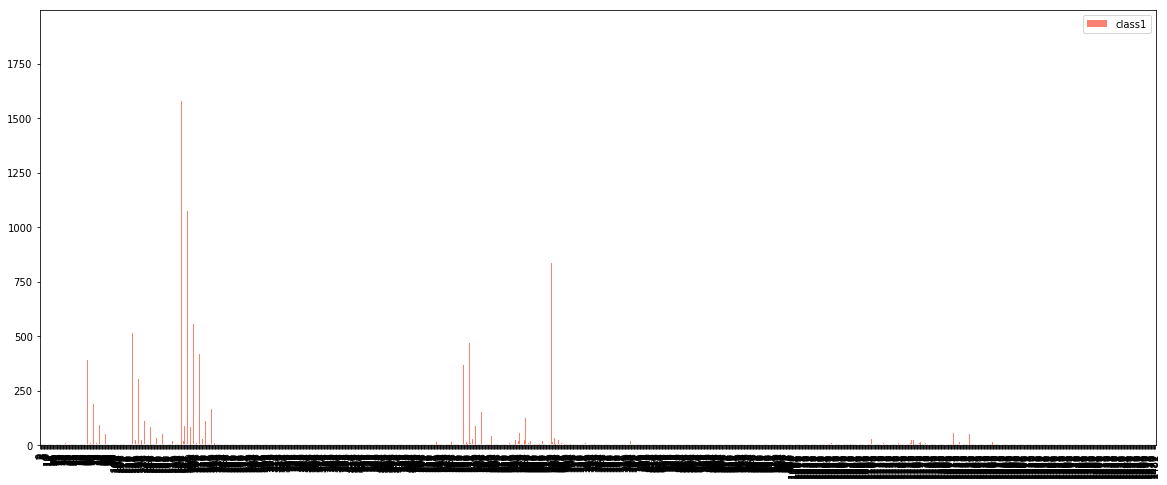

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#joint_contingency.total.plot(kind='bar', ax=ax, color='skyblue', label='bulk')
ax.axhline(y=freq_target, color='0.9', ls='--')
ax.axhline(y=0.1, color='0.9', ls='--')
ax.axhline(y=0.2, color='0.9', ls='--')
jp.contingency[1].plot(kind='bar', ax=ax, color='salmon', label='class1')
ax.legend()

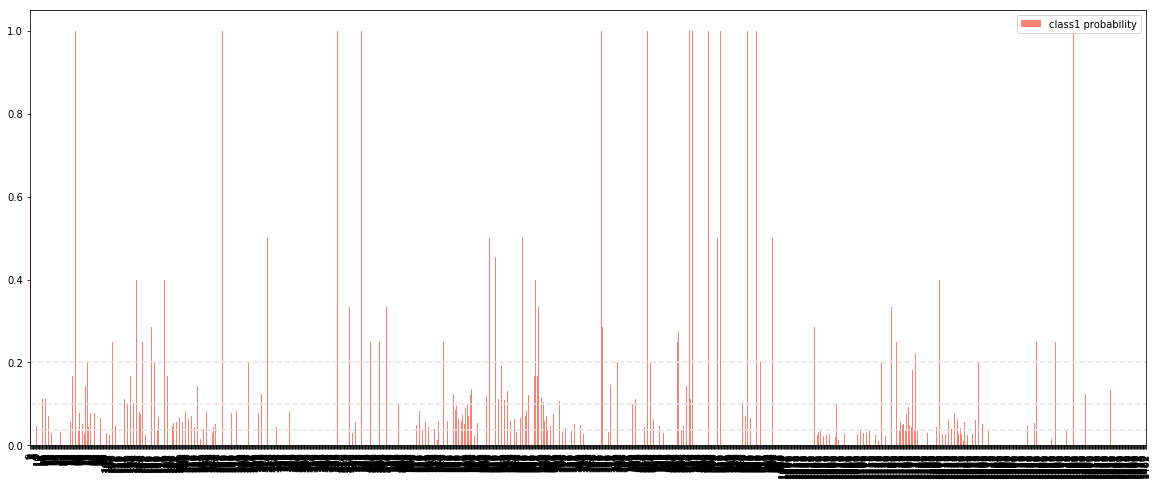

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#joint_contingency.total.plot(kind='bar', ax=ax, color='skyblue', label='bulk')
ax.axhline(y=freq_target, color='0.9', ls='--')
ax.axhline(y=0.1, color='0.9', ls='--')
ax.axhline(y=0.2, color='0.9', ls='--')
jp.contingency['ind_proba'].plot(kind='bar', ax=ax, color='salmon', label='class1 probability')
ax.legend()